# Day Two - Introduction to Pandas

## Today's agenda

* Talk about 🐼 (not that kind of panda)
* Pandas data structures
* Reading and writing CSV files to disk
* Exploring and summarizing data
* Subsetting Data
* Transforming Data

In [ ]:
# First, we need to load pandas into memory and give it the name "pd"
import pandas as pd

## Diving into Pandas

* Pandas is a 3rd-party library for doing data analysis
* It is a foundational component of Python data science
* Developed by [Wes McKinney](http://wesmckinney.com/pages/about.html) while working in the finance industry, so it has some...warts
* Vanilla Python can do many of the same things, but Pandas does them *faster* and usually *easier*
* To do this, pandas introduces a set of data structures and analysis functions

---

## Introduction to Pandas Data Structures

* To understand Pandas, which is hard, it is helpful to start the data structures it adds to Python:
    * Series - For one dimensional data (lists) 
    * Dataframe - For two dimensional data (spreadsheets)
    * Index - For naming, selecting, and transforming data within a Pandas Series or Dataframe (column and row names)

### Series

* A one-dimensional array of indexed data
* Kind of like a blend of a Python list and dictionary
* You can create them from a Python list



In [11]:
to_find = 13
test_list = [23, 5, 7, 0, 13, 55, 97, 3]
for i in range(0, len(test_list)):
    if to_find == test_list[i]:
        print("Found at position: ", i)
        
print("Before sort: ", test_list[1])
sorted_list = sorted(test_list)
print("After sort: ", sorted_list[1])




Found at position:  4
Before sort:  5
After sort:  3


**Start with an ordered list**

[0, 3, 5, 7, 10, 11, 12, 13, 23, 55, 97]

**Find the middle element**

11

**Compare middle element to search value**

[12, 13, 23, 55, 97]

**Find the middle element**

23

**Compare middle element to search value**

[12, 13]


if I have 1,000,000 records

with linear search: 1,000,000 comparisons
with binary search: log2N = 20 comparisons





In [ ]:
pd.Series()

In [4]:
# Create a regular Python list
my_list = [0.25, 0.5, 0.75, 1.0]
print(my_list)
#print(my_list[1])

# Transform that list into a Series
data = pd.Series(my_list)

# Display the data in the series
print(data)
#print(data[1])

[0.25, 0.5, 0.75, 1.0]
0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64


* A Series is a list-like structure, which means it is *ordered* 
* You can use indexing to grab items in a Series, just like a list
* Those numbers next to the other numbers, that is the *index* to the series
* It is best to use the `iloc` method to grab elements by their location in the series.

In [10]:
# grab the first element
data[0]

0.25

In [ ]:
# grab the 4th elemenet
data.iloc[3]

#### Quick Exercise
* How might we grab the *last* element if we didn't know the length of the list?

In [12]:
# hint: think small
# your code below
data.iloc[-1]


1.0

#### Quick Exercise

* Use index notation to grab the 2nd element of `data`

In [ ]:
# hint: the 2nd element is 0.50
# your code below
data.iloc[1]


* Also, like lists, you can use *slicing* notation to grab sub-lists
* Again, it is best to use the `.iloc` method

#### Quick Exercise

* Use slices to grab the 2nd and 3rd elements of this series

In [ ]:
# hint: the 2nd & 3rd elements are 0.50 and 0.75
# your code below
data.iloc[1:3]


### Index by name

* Series also act like Python dictionaries, *ordered* python dictionaries
* This means you can grab things by name in addition to location

In [13]:
# Create a regular Python Dictionary
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}

# Transform that dictionary into a Series 
population = pd.Series(population_dict)

# Display the data
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

* You can use indexing and slicing like above, but now with keys instead of numbers!
* It is best to use the `.loc` method when looking up things by name instead of by number


In [14]:
population['California']

38332521

In [15]:
# select the data value with the name "California"
population.iloc[1]

19552860

In [17]:
# What happens if you try an use a name when it wants
population.loc['California']

38332521

* Like a Python dictionary, a Series is a list of key/value pairs
* But these are *ordered*, which means you can do slicing

#### Quick Exercise

* Try slicing this series, but with keys instead of numbers!
* Select a subset of the data using the Python slicing notation
* Don't forget, use `loc`!

In [18]:
# Hint: Use the same : notation, but use the state names listed above
# Your code here:

population['Illinois':'Texas']

Illinois    12882135
New York    19651127
Texas       26448193
dtype: int64

In [19]:
sorted_population = population.sort_values(ascending=False)
sorted_population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [ ]:
population

In [ ]:
sorted_population

In [21]:
sorted_by_index = population.sort_index()
sorted_by_index

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

### DataFrame

* `DataFrames` are the real workhorse of Pandas and Python Data Science
* We will be spending a lot of time with data inside of Dataframes, so buckle up!
* `DataFrames` contain two-dimensional data, just like an Excel spreadsheet
* In practice, a `DataFrame` is a bunch of `Series` lined up next to each other

In [23]:
# Start with our population Series
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

In [24]:
# Then create another Series for the area
area_dict = {'Illinois': 149995, 
             'California': 423967, 
             'Texas': 695662, 
             'Florida': 170312, 
             'New York': 141297, 
             'Virginia': 1000000}
area = pd.Series(area_dict)
area

California     423967
Florida        170312
Illinois       149995
New York       141297
Texas          695662
Virginia      1000000
dtype: int64

In [25]:
# Create a dictionary with a key:value for each column
state_info_dictionary = {
    'population': population,
    'area': area
}

# Now mash them together into a DataFrame
states = pd.DataFrame(state_info_dictionary)
# Display the data
states

,area,population
California,423967,38332521.0
Florida,170312,19552860.0
Illinois,149995,12882135.0
New York,141297,19651127.0
Texas,695662,26448193.0
Virginia,1000000,NaN


In [30]:
states['population']

California    38332521.0
Florida       19552860.0
Illinois      12882135.0
New York      19651127.0
Texas         26448193.0
Virginia             NaN
Name: population, dtype: float64

In [29]:
states['area']

California     423967
Florida        170312
Illinois       149995
New York       141297
Texas          695662
Virginia      1000000
Name: area, dtype: int64

In [28]:
states.loc['California']

area            423967.0
population    38332521.0
Name: California, dtype: float64

* Pandas automatically lines everything up because they have shared index values

In [36]:
# create a list of dictionaries that contain our data.
# one dictionary per observation/row
dead_people = [
    {"ssn":1, "first_name": "Bob", "last_name": "Jones", "age": 200},
    {"ssn":2, "first_name": "Jane", "last_name": "Jones", "age": 199},
    {"ssn":3, "first_name": "Ethel", "last_name": "Jones", "age": 180},
    {"ssn":4, "first_name": "Hortense", "last_name": "Jones", "age": 178},
    {"ssn":5, "first_name": "Vern", "last_name": "Jones", "age": 178}
]

cols = ["ssn","first_name","last_name","age"]
# create a Dataframe from a list of dictionaries
df = pd.DataFrame(dead_people, columns=cols)
df.set_index(df['ssn'])
#pd.DataFrame(dead_people)

,ssn,first_name,last_name,age
ssn,,,,
1,1,Bob,Jones,200
2,2,Jane,Jones,199
3,3,Ethel,Jones,180
4,4,Hortense,Jones,178
5,5,Vern,Jones,178


In [ ]:
# create a list of lists, each sub-list is an observation/row
dead_people = [
    [1,"Bob","Jones",200],
    [2,"Jane","Jones",199],
    [3,"Ethel","Jones",180],
    [4,"Hortense","Jones",178],
    [5,"Vern","Jones",178]
]

# specify the column names seperately
column_names = ["ssn","first_name", "last_name", "age"]

# make a Dataframe with column names specified separately
pd.DataFrame(dead_people, columns=column_names)

In [ ]:
# create a list of lists, each sub-list is an observation/row
dead_people = [
    [1,"Bob","Jones",200],
    [2,"Jane","Jones",199],
    [3,"Ethel","Jones",180],
    [4,"Hortense","Jones",178],
    [5,"Vern","Jones",178]
]

# specify the column names seperately
column_names = ["ssn","first_name", "last_name", "age"]

row_ids = [123,3452,3235,4345,563463]

# make a Dataframe with column names specified separately
pd.DataFrame(dead_people, columns=column_names, index=row_ids)

## Index

* Pandas `Series` and `DataFrames` are containers for data
* The Index (and Indexing) is the mechanism to make that data retrievable
* In a `Series` the index is the key to each value in the list
* In a `DataFrame` the index is the column names, but there is also an index for each row
* Indexing allows you to merge or join disparate datasets together

In [37]:
states

,area,population
California,423967,38332521.0
Florida,170312,19552860.0
Illinois,149995,12882135.0
New York,141297,19651127.0
Texas,695662,26448193.0
Virginia,1000000,NaN


* The `loc` method I talked about above allows us to select specific rows and columns *by name*.
* Use the syntax `[<row>,<column>]` with index values

In [40]:
states[["area","population"]]
#states["area"]

,area,population
California,423967,38332521.0
Florida,170312,19552860.0
Illinois,149995,12882135.0
New York,141297,19651127.0
Texas,695662,26448193.0
Virginia,1000000,NaN


In [41]:
# Get the value of the population column from Illinois
states.loc["Illinois":"Texas", "population"]

Illinois    12882135.0
New York    19651127.0
Texas       26448193.0
Name: population, dtype: float64

* We can also be tricky and use more advanced syntax to do more advanced queries.

In [42]:
# Get the area for states from Florida to Texas
# this is two dimensional slicing
states.loc["Florida":"Texas", "area"]

Florida     170312
Illinois    149995
New York    141297
Texas       695662
Name: area, dtype: int64

In [43]:
# Get the area for Florida and Texas
# Use a list to select multiple specific values
states.loc[["Florida", "Texas"], "area"]

Florida    170312
Texas      695662
Name: area, dtype: int64

In [44]:
# Get area and population for Florida and Texas
# use a ":" to specify "all columns"
states.loc[["Florida", "Texas"], :]

,area,population
Florida,170312,19552860.0
Texas,695662,26448193.0


In [45]:
states.loc[:,:]

,area,population
California,423967,38332521.0
Florida,170312,19552860.0
Illinois,149995,12882135.0
New York,141297,19651127.0
Texas,695662,26448193.0
Virginia,1000000,NaN


* What is happening here is we are passing a list of names for the rows, and using the colon ":" to say "all columns
* OK, this is neat, but let's move on to some *real* examples

---

## Reading Files into a Dataframe

* Once your data is in a Pandas `DataFrame` you can easily use a ton of analytical tools
* You just have to get your data to fit into a dataframe
* Getting data to fit is a big part of the "data janitor" work...it is the craft of data carpentry
* However, as we will see, there is still a lot of carpentry work to do once your data fits into a `DataFrame`

### Open the file and load it into memory

* Pandas provides some very handy functions for reading in CSV files.

* This is how we open a CSV file with pure Python

In [46]:
# Load up the CSV module
import csv

#
file_handler = open('community-center-attendance.csv')
# Load the file into the CSV module
reader = csv.reader(file_handler)

# Read all the data into a variable as a list. look ma! one line!
    
center_attendance_python = [row for row in reader]

# close the file handler for good hygiene 
file_handler.close()


# Print out the first five rows 
center_attendance_python[0:5]

[['_id', 'date', 'center_name', 'attendance_count'],
 ['1', '2018-06-08', 'Ormsby Community Center', '10'],
 ['2', '2018-06-08', 'Paulson Community Center', '19'],
 ['3', '2018-06-08', 'Phillips Community Center', '107'],
 ['4', '2018-06-08', 'Ammon Community Center', '81']]

* Pandas can do this much easier using the `read_csv()` function

In [47]:
# Open up the csv file the Pandas way
center_attendance_pandas = pd.read_csv("community-center-attendance.csv", 
                                       index_col="_id") # use the column named _id as the row index
# Display the first five rows
center_attendance_pandas.iloc[0:5]

,date,center_name,attendance_count
_id,,,
1,2018-06-08,Ormsby Community Center,10
2,2018-06-08,Paulson Community Center,19
3,2018-06-08,Phillips Community Center,107
4,2018-06-08,Ammon Community Center,81
5,2018-06-08,Brookline Community Center,33


* Notice that Pandas figured out there is a header row and it create a row index from one of the columns
* Pandas also has a special function, `head(n)` for looking at the first *n* rows in a dataframe

In [48]:
# Use the head function to look at the "head" 
# of the dataframe. Default is 5 rows.
center_attendance_pandas.head()

,date,center_name,attendance_count
_id,,,
1,2018-06-08,Ormsby Community Center,10
2,2018-06-08,Paulson Community Center,19
3,2018-06-08,Phillips Community Center,107
4,2018-06-08,Ammon Community Center,81
5,2018-06-08,Brookline Community Center,33


In [50]:
# Use the head function to look at the "head" 
# of the dataframe. Default is 5 rows.
center_attendance_pandas.head(20)

,date,center_name,attendance_count
_id,,,
1,2018-06-08,Ormsby Community Center,10
2,2018-06-08,Paulson Community Center,19
3,2018-06-08,Phillips Community Center,107
4,2018-06-08,Ammon Community Center,81
5,2018-06-08,Brookline Community Center,33
6,2018-06-08,Jefferson Community Center,29
7,2018-06-08,Warrington Community Center,15
8,2018-06-08,West Penn Community Center,54
9,2018-06-07,Phillips Community Center,77


* Notice the index starts at 1 instead of zero, that is because we told Pandas to use the "_id" column as the row index.
* This is when it is important to understand the difference between `loc` and `iloc`

In [ ]:
# Select row by index name
center_attendance_pandas.loc[1]

In [ ]:
# Select row by index location
center_attendance_pandas.iloc[1]

In [52]:
center_attendance_pandas.tail(10)

,date,center_name,attendance_count
_id,,,
18358,2011-03-10,West Penn Community Center,1
18359,2011-03-09,Phillips Community Center,13
18360,2011-03-09,Brookline Community Center,60
18361,2011-03-09,Magee Community Center,37
18362,2011-03-08,Brookline Community Center,22
18363,2011-03-08,Magee Community Center,32
18364,2011-03-08,West Penn Community Center,3
18365,2011-03-07,Warrington Community Center,1
18366,2011-03-07,Magee Community Center,7


In [53]:
df = center_attendance_pandas.sample(100)

---

## Exploring and Summarizing data

* Once your data has been loaded as a Dataframe, you can start using Pandas various functions to quickly explore your data 

### Helpful functions for exploring the data

* Looking at parts of the Dataframe
* `<dataframe>.head(n)` - look at the first n rows of the dataframe
* `<dataframe>.tail(n)` - look at the last n rows of the dataframe
* `<dataframe>.sample(n)` - randomly select n rows from the dataframe

In [ ]:
# Look at the first 10 rows
center_attendance_pandas.head(10)

In [ ]:
# Look at the last 5 rows
center_attendance_pandas.tail()

In [ ]:
# Grab 5 random rows
center_attendance_pandas.sample(2)

* How many rows and columns?
* `<dataframe>.shape` - return the rows and columns as a python data structure (not a function!)
* `<dataframe>.info()` - Display the datatypes of the index and columns as well as memory usage
* `<dataframe>.describe()` - Compute summary statistics for numerical columns

In [54]:
# How many rows and columns
center_attendance_pandas.shape

(18367, 3)

In [ ]:
sub_center = center_attendance_pandas.sample(1000)
sub_center.shape

In [56]:
# Inspect the datatypes
center_attendance_pandas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18367 entries, 1 to 18367
Data columns (total 3 columns):
date                18367 non-null object
center_name         18367 non-null object
attendance_count    18367 non-null int64
dtypes: int64(1), object(2)
memory usage: 574.0+ KB


* The output above shows us a lot of implementation details about our dataframe
* Data types, number of rows and columns, and the datatype of the column
* Also shows us memory usage, which is useful because memory is a limited resource

* We can also start doing some computations on the data

In [57]:
# Compute summary statistics on the numerical columns
center_attendance_pandas.describe()

,attendance_count
count,18367.000000
mean,61.934883
std,58.510201
min,1.000000
25%,24.000000
50%,43.000000
75%,80.000000
max,741.000000


* The `describe()` function will automatically compute summary statistics for numerical columns and ignore categorical columns

### Counting Numerical Data

* We can use traditional Python functions to get information about our Dataframe.
* The `len()` function tells us the length of the sequence 

In [59]:
# use a standard python function to get the length of the sequence
len(center_attendance_pandas["center_name"])

18367

* So this tells us our dataset has 18,367 rows.
* But this is just information about the dataset itself, it doesn't tell us how many people visited community centers
* How many people visited all the community centers for all time (in the dataset)?
* First let's answer this using pure python

In [ ]:
# look at the first ten rows of the data loaded in python
center_attendance_python[0:10]

In [ ]:
# create a variable to hold the total attendance
total_attendance = 0

# loop over the data that was loaded using pure python
for row in center_attendance_python[1:]: # skip the header row using a list slice
    # add the row count to the total, convert string to int
    row_attendance = int(row[3])
    total_attendance = total_attendance + row_attendance

print(total_attendance)

* Now here is how we do the exact same thing with Pandas 😄
* This code selects the `attendance_count` column and then computes the sum of all the values.

In [ ]:
# compute the total attendance with the pandas sum function
center_attendance_pandas['attendance_count'].sum()

* We can also look at the summary statistics individually
* `<dataframe>[<column name>].mean()` - calculate the mean value for the column values
* `<dataframe>[<column name>].std()` - calculate the standard deviation for the column values
* `<dataframe>[<column name>].var()` - calculate the variance value for the column values
* `<dataframe>[<column name>].median()` - calculate the median value for the column values
* `<dataframe>[<column name>].min()` - calculate the minimum value for the column values

In [60]:
# mean attendance per day at all community centers
center_attendance_pandas['attendance_count'].mean()

61.93488321446072

In [61]:
# standard deviation
center_attendance_pandas['attendance_count'].std()

58.51020126797496

In [62]:
# variance
center_attendance_pandas['attendance_count'].var()

3423.443652418939

In [63]:
# median attendance per day at all community centers
center_attendance_pandas['attendance_count'].median()

43.0

In [64]:
# minimum attendance at community centers
center_attendance_pandas['attendance_count'].min()

1

* Pandas is not only a tool for working with numerical data
* Lots of functionality for manipulating categorical data too

### Counting Categorical Data

* Just like before we can start counting the distribution of values in the column. 
* how many entries per community center (this isn't counting attendance but counting the number of rows per center).

* The "Pythonic way"

In [ ]:
# Create a dictionary to store the counts
center_counter = dict()

# loop over the data
for row in center_attendance_python[1:]:
    center = row[2]
    
    # check to see if the gender is already in the diction
    if center not in center_counter:
        # create a new entry
        center_counter[center] = 1
    else:
        # increment a new entry
        #center_counter[center] += 1
        center_counter[center] = center_counter[center] + 1

# Display the dictionary 
center_counter

* The Pandas way is a bit easier

In [ ]:
# what happens when you sum a column of string categories
#center_attendance_pandas['center_name'].sum()

In [65]:
# Do the same thing with pandas
center_attendance_pandas['center_name'].value_counts()

Brookline Community Center       2159
West Penn Community Center       2130
Phillips Community Center        2116
Ormsby Community Center          1990
Ammon Community Center           1825
Magee Community Center           1800
Warrington Community Center      1714
Jefferson Community Center       1701
Paulson Community Center         1547
Arlington Community Center       1331
Phillips Park Field                13
Ormsby Field (Playground)           8
West Penn Pool                      7
Mellon Tennis Center                6
Gladstone Field                     5
Paulson Field                       3
Ammon Pool                          3
Arlington Field (Playground)        1
Warrington Field                    1
Schenley Ice Rink                   1
Moore Pool                          1
West Penn Fields                    1
Highland Pool                       1
Frick Environmental Center          1
Dan Marino Field (Playground)       1
Ammon / Josh Gibson Field           1
Name: center

In [66]:
# Do the same thing with pandas
center_attendance_pandas['attendance_count'].value_counts()

24     323
26     304
18     295
20     291
23     291
27     282
25     282
29     273
22     272
35     272
31     266
28     264
19     264
30     260
33     259
32     258
21     253
34     249
16     244
15     243
17     242
40     222
41     220
37     215
36     212
38     204
43     202
14     201
39     199
47     197
      ... 
303      1
394      1
378      1
346      1
408      1
495      1
424      1
601      1
393      1
329      1
531      1
307      1
290      1
292      1
299      1
315      1
356      1
372      1
395      1
388      1
420      1
351      1
529      1
355      1
385      1
369      1
337      1
321      1
248      1
511      1
Name: attendance_count, Length: 383, dtype: int64

In [ ]:
# Do the same thing with pandas
center_attendance_pandas['date'].value_counts()

In [ ]:
len(center_attendance_pandas['center_name'].unique())

In [67]:
# Do the same thing with pandas
center_attendance_pandas['center_name'].unique()

array(['Ormsby Community Center', 'Paulson Community Center',
       'Phillips Community Center', 'Ammon Community Center',
       'Brookline Community Center', 'Jefferson Community Center',
       'Warrington Community Center', 'West Penn Community Center',
       'Magee Community Center', 'Arlington Community Center',
       'Gladstone Field', 'Mellon Tennis Center', 'Phillips Park Field',
       'Schenley Ice Rink', 'Warrington Field', 'West Penn Fields',
       'West Penn Pool', 'Dan Marino Field (Playground)', 'Paulson Field',
       'Ormsby Field (Playground)', 'Ammon Pool', 'Moore Pool',
       'Frick Environmental Center', 'Arlington Field (Playground)',
       'Highland Pool', 'Ammon / Josh Gibson Field'], dtype=object)

### Splitting Data with GroupBy


* A common pattern in data analysis is splitting data by a key and then performing some math on all of the values with that key and finally combining it all back together
* This is commonly known in data circles as *split, apply, combine*


In [69]:
# create a dataframe to illustrate GroupBy
df = pd.DataFrame({'label': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6),
                   'things':[45,234,6,2,1324,345]}, 
                  columns=['label', 'data', 'things'])
df

,label,data,things
0,A,0,45
1,B,1,234
2,C,2,6
3,A,3,2
4,B,4,1324
5,C,5,345


In [70]:
# Dataframes have a method, groupby(), that takes a column name be be the grouping key
df.groupby('label')

* Cool, but what is that? Well, we need to tell Pandas what to *do* with the groups
* This is where we get to the *apply* step
* We need to specify what kind of aggregation, transformation, or computation to perform on the group

In [71]:
# Tell pandas to add up all of the values for each key
df.groupby(['label']).sum()

,data,things
label,,
A,3,47
B,5,1558
C,7,351


In [72]:
grouped_dataframe = df.groupby('label')
grouped_dataframe.sum()

,data,things
label,,
A,3,47
B,5,1558
C,7,351


In [73]:
center_attendance_pandas.groupby("center_name").max()

,date,attendance_count
center_name,,
Ammon / Josh Gibson Field,2011-12-07,1
Ammon Community Center,2018-06-08,319
Ammon Pool,2012-06-27,44
Arlington Community Center,2018-01-18,346
Arlington Field (Playground),2012-01-12,9
Brookline Community Center,2018-06-08,741
Dan Marino Field (Playground),2013-08-05,104
Frick Environmental Center,2012-02-29,5
Gladstone Field,2017-06-22,140


The following table summarizes some other built-in Pandas aggregations:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``size()``               | Total number of items w/ NaNs   |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

These are all methods of ``DataFrame`` and ``Series`` objects.

#### Quick Exercise
* Using the community center dataframe  try the aggregations above

In [ ]:
# Try a aggregation function to see what it does by adding it after the period.

center_attendance_pandas.groupby("center_name").prod()


In [ ]:
# Try a aggregation function to see what it does by adding it after the period.

center_attendance_pandas.groupby("center_name").size()


---

## Challenge 1

![](http://i0.kym-cdn.com/photos/images/newsfeed/001/296/855/bff.png)

I am the Data and I speak for the [trees](https://data.wprdc.org/dataset/city-trees).

Analyze PGH tree data with descriptive statistics. Answer the following questions using Pandas and the provided data about Pittsburgh's trees.

* What is the average height and width of trees in Pittsburgh?
* How tall is the tallest tree?
* What is the tallest type of tree in pittsburgh on average?
* Bonus: In what neighborhood is the widest tree? 
    * Hint: try the `idxmax()` to get the row id of the max value then select that row by id

In [74]:
#First step read csv into dataframe 
tree_data = pd.read_csv("Tree_data.csv", low_memory=False)
tree_data.head()

,_id,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,6201,494907651,667,PENN AVE,Ginkgo,Ginkgo biloba,18.0,9.0,5.0,5.0,...,Central Business District,6.0,2.0,42003020100,6.0,2.0,2.0,1-3,40.443243,-80.000526
1,6202,1094044963,201,S LEXINGTON ST,Sweetgum: American,Liquidambar styraciflua,40.0,10.0,4.0,4.0,...,Point Breeze,9.0,14.0,42003140600,3.0,14.0,4.0,3-14,40.447554,-79.900169
2,6203,292899507,201,S LEXINGTON ST,Pagodatree: Japanese,Sophora japonica,25.0,12.0,99.0,99.0,...,Point Breeze,9.0,14.0,42003140600,3.0,14.0,4.0,3-14,40.447247,-79.899926
3,6204,1474662812,211,S LEXINGTON ST,Birch: River,Betula nigra,35.0,6.0,99.0,99.0,...,Point Breeze,9.0,14.0,42003140600,3.0,14.0,4.0,3-14,40.447159,-79.899924
4,41402,1756120617,3037,ZEPHYR AVE,Vacant Site Small,Vacant Site Small,NaN,NaN,NaN,NaN,...,Sheraden,2.0,20.0,42003562500,5.0,20.0,6.0,1-16,40.457238,-80.054393


**First things first, let's break it down!**

![Break it down corgi](https://media0.giphy.com/media/TRff1szV5FYXu/giphy.gif)

In [75]:
tree_data.shape

(45310, 59)

In [76]:
df = tree_data[['common_name', 'width']]
df.head()


,common_name,width
0,Ginkgo,9.0
1,Sweetgum: American,10.0
2,Pagodatree: Japanese,12.0
3,Birch: River,6.0
4,Vacant Site Small,NaN


In [79]:
df.groupby('common_name').mean()

,width
common_name,
Amur Corktree,3.177778
Amur Maackia,5.588235
Apple: Common,3.130435
Apple: Paradise,4.000000
Arborvitae: Eastern,1.345679
Ash: Black,0.000000
Ash: Green,5.888430
Ash: White,3.122807
Ash: spp.,0.000000


In [ ]:
# What is the average height of Pittsburgh trees?
# Your code below

# We want to work with the column named: height
# 


In [ ]:
# How tall is the tallest tree?
# Your code below


In [ ]:
# What is the tallest type of tree in Pittsburgh on average?
# Your code below


In [ ]:
# Bonus: In what neighborhood is the widest tree?
# Your code below


#### Challenge Answers

* What is the average height of Pittsburgh trees?

In [ ]:
# first step, select just the height values of the trees
tree_heights = tree_data["height"]

# second step, compute the mean of those values using the max function
tree_height_mean = tree_heights.mean()

print("The average height of trees in Pittsburgh is", tree_height_mean, "feet")

* What is the average width of Pittsburgh trees?


In [ ]:
# first step, select just the widths of the trees
tree_widths = tree_data["width"]

# second step, compute the mean of those values using the mean fuctions
tree_width_mean = tree_widths.mean()

print("The average width of trees in Pittsburgh is", tree_width_mean, "feet")

* How tall is the tallest tree?

In [ ]:
# first step, use idxmax to get the row index of the max value
tallest_tree = tree_data["height"]

# second step, compute the max value of the heights 
tallest_tree_height = tree_heights.max()

print("The tallest tree is", tallest_tree_height, "feet")

* On average, what is the tallest type of tree in Pittsburgh?

In [ ]:
# First step, group by the common name
grouped_by_name = tree_data.groupby("common_name")

heights_by_name = grouped_by_name['height']

average_heights_by_name = heights_by_name.mean()

average_heights_by_name.head()

* In what neighborhood is the widest tree?

In [ ]:
# first and second step, select the widths and use idxmax to get the row index of the max value
widest_tree_id = tree_data["width"].idxmax()
widest_tree_id

In [ ]:
# third step, select that row with by its index
widest_tree = tree_data.loc[widest_tree_id]
widest_tree

In [ ]:
# forth step, select the neighborhood from that 
widest_tree_neighborhood = widest_tree['neighborhood']

print("The widest tree is in", widest_tree_neighborhood)

---

## Subsetting Data

* It is sometimes helpful to think of a Pandas Dataframe as a little database. 
* There is data and information stored in the Pandas Dataframe (or Series) and you want to *retrieve* it.
* Pandas has multiple mechanisms for getting specific bits of data and information from its data structures. 

### Masking: Filtering by Values

* The most common is to use *masking* to select just the rows you want. 
* Masking is a two stage process, first you create a sequence of boolean values based upon a conditional expression--which you can think of as a "query"--and then you index your dataframe using that boolean sequence. 

In [80]:
# Let's look at the tree data again
tree_data = pd.read_csv("Tree_data.csv", low_memory=False)
tree_data.head()

,_id,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,6201,494907651,667,PENN AVE,Ginkgo,Ginkgo biloba,18.0,9.0,5.0,5.0,...,Central Business District,6.0,2.0,42003020100,6.0,2.0,2.0,1-3,40.443243,-80.000526
1,6202,1094044963,201,S LEXINGTON ST,Sweetgum: American,Liquidambar styraciflua,40.0,10.0,4.0,4.0,...,Point Breeze,9.0,14.0,42003140600,3.0,14.0,4.0,3-14,40.447554,-79.900169
2,6203,292899507,201,S LEXINGTON ST,Pagodatree: Japanese,Sophora japonica,25.0,12.0,99.0,99.0,...,Point Breeze,9.0,14.0,42003140600,3.0,14.0,4.0,3-14,40.447247,-79.899926
3,6204,1474662812,211,S LEXINGTON ST,Birch: River,Betula nigra,35.0,6.0,99.0,99.0,...,Point Breeze,9.0,14.0,42003140600,3.0,14.0,4.0,3-14,40.447159,-79.899924
4,41402,1756120617,3037,ZEPHYR AVE,Vacant Site Small,Vacant Site Small,NaN,NaN,NaN,NaN,...,Sheraden,2.0,20.0,42003562500,5.0,20.0,6.0,1-16,40.457238,-80.054393


In [81]:
# Let's look at all the columns
tree_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45310 entries, 0 to 45309
Data columns (total 59 columns):
_id                                          45310 non-null int64
id                                           45310 non-null int64
address_number                               38621 non-null object
street                                       38606 non-null object
common_name                                  45305 non-null object
scientific_name                              45305 non-null object
height                                       41309 non-null float64
width                                        41291 non-null float64
growth_space_length                          41290 non-null float64
growth_space_width                           41291 non-null float64
growth_space_type                            45269 non-null object
diameter_base_height                         41324 non-null float64
stems                                        45309 non-null float64
overhead_utiliti

* How might we only look at trees in a particular neighborhood?
* First step is to create a *query mask*, a list of `True/False` values for rows that satisfy a particular condition.

In [84]:
# create a query mask for trees in only the Greenfield neighborhood
#tree_data['neighborhood'] != "Greenfield"
neighborhood_query = tree_data['neighborhood'] == "Greenfield"
neighborhood_query.sample(20)

8535     False
24412    False
30978    False
30195    False
26014    False
36424    False
1445     False
8598     False
6290     False
42112    False
27793    False
43102    False
2657     False
40832    False
27597    False
23710    False
7061     False
5322     False
18281    False
9746     False
Name: neighborhood, dtype: bool

In [ ]:
# create a query mask for trees in all but the Greenfield neighborhood
neighborhood_query = tree_data['neighborhood'] != "Greenfield"
neighborhood_query.sample(20)

In [ ]:
# create a query mask for trees in the Greenfield neighborhood
neighborhood_query = tree_data['neighborhood'] == "Greenfield"
neighborhood_query.sample(20)

* This tells us the row id and True or False if the neighborhood equals Greenfield
* We can look up that row by index and see if it is correct

In [ ]:
tree_data.loc[28100]

* Yup! So now that we know the mask works, we can create a *subset* of our data containing Greenfield trees.

In [97]:
q = 'neighborhood = "Greenfield" && width > 25'
greenfield_trees = tree_data.filter(q)
greenfield_trees.head()

""
0
1
2
3
4


In [98]:
#greenfield_trees = tree_data[neighborhood_query]
greenfield_trees = tree_data[
    tree_data['neighborhood'] == "Greenfield"]
greenfield_trees.head()

,_id,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
182,6334,1384387817,4027,BEECHWOOD BLVD,Pine: Scotch,Pinus sylvestris,25.0,3.0,99.0,99.0,...,Greenfield,5.0,15.0,42003151700,3.0,15.0,4.0,2-15,40.426561,-79.937017
542,6556,680168146,4027,BEECHWOOD BLVD,Maple: Norway,Acer platanoides,25.0,10.0,99.0,3.0,...,Greenfield,5.0,15.0,42003151700,3.0,15.0,4.0,2-15,40.426809,-79.937328
564,615,805335029,221,KAERCHER ST,Maple: Norway,Acer platanoides,25.0,8.0,99.0,8.0,...,Greenfield,5.0,15.0,42003151600,3.0,15.0,4.0,2-12,40.423296,-79.947395
1270,1109,395764414,912,KENNEBEC ST,London planetree,Platanus x acerifolia,45.0,10.0,99.0,2.0,...,Greenfield,5.0,15.0,42003151700,3.0,15.0,4.0,2-15,40.425025,-79.931320
1275,1111,931885771,1047,MIRROR ST,Oak: Pin,Quercus palustris,32.0,12.0,99.0,2.0,...,Greenfield,5.0,15.0,42003151700,3.0,15.0,4.0,2-15,40.426163,-79.929321


* Now you can do things like calculate the average height for just the Greenfield neighborhood

In [ ]:
# Calculate the mean height for greenfield trees
greenfield_trees['height'].mean()

* We can also combine query masks using boolean logic
* Can we look at just the Norway Maples in Squirrel Hill South?

In [ ]:
# create a query mask for squirrel hill south
neighborhood_query = tree_data['neighborhood'] == "Squirrel Hill South"
# create a query mask for norway maples
tree_query = tree_data['common_name'] == "Maple: Norway"

# apply both query masks using boolean AND
norway_in_squirrel_hill = tree_data[neighborhood_query & tree_query]
norway_in_squirrel_hill.head()

In [ ]:
norway_in_squirrel_hill['height'].median()

* You can also use computations to subset the data
* For example, lets just select the tall trees over 100 feet.

In [ ]:
# create a query mask that selects trees with a height greater than 100 feet
tall_trees_query = tree_data['height'] > 100

# create a subset of just tall trees and display them
tall_trees = tree_data[tall_trees_query]
tall_trees.head(10)


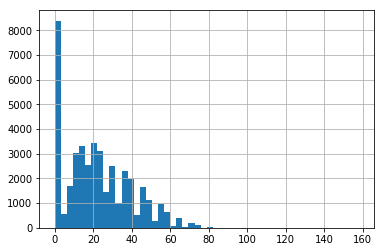

In [101]:
%matplotlib inline
tree_data['height'].hist(bins=50)

In [ ]:
len(tree_data)

* It would appear there are five trees taller than 100 "feet" in the dataset

In [102]:
less_columns = tree_data.filter(items=["_id", "common_name", "height", "width"])
less_columns.head()

,_id,common_name,height,width
0,6201,Ginkgo,18.0,9.0
1,6202,Sweetgum: American,40.0,10.0
2,6203,Pagodatree: Japanese,25.0,12.0
3,6204,Birch: River,35.0,6.0
4,41402,Vacant Site Small,NaN,NaN


In [ ]:
less_columns = tree_data.filter(like="air", axis=0)
less_columns.head()

## Challenge 2

![Tree pandas](http://i.imgur.com/wvfuagf.gif)
 Now that we know how to query Pandas Dataframes, let's try and get some answers!

* Create a subset of the data that represents the most valuable trees in your favorite neighborhood.
    * Hint: Use `tree_data.info()` to look for columns related to value.
    * Hint: You will need to define a threshold for "valuable"
* How many trees are in that subset?
    * Hint: Use a standard Python function
* How many trees of different types are in that subset?
    * Hint: Look back to the Counting Categorical Data section 

**First things first, let's break it down!**

![Break it down corgi](https://media0.giphy.com/media/TRff1szV5FYXu/giphy.gif)

In [ ]:
# Write some pseudo code before you write some real code

In [ ]:
# Look at the distribution of dollar value to get a sense of tree values
tree_data['overall_benefits_dollar_value'].describe()

In [ ]:
# Create a subset of data that represents the most valuable trees in your favorite neightborhood
favorite_neighborhood_query = tree_data['neighborhood'] == "Greenfield"
value_threshold = tree_data['overall_benefits_dollar_value'] > 100
greenfield_money_trees = tree_data[favorite_neighborhood_query & value_threshold]

# Look at the range of values for Greenfield trees
greenfield_money_trees.head(10)

In [ ]:
# How many trees in that subset?
greenfield_money_trees['overall_benefits_dollar_value'].describe()

In [ ]:
# How many trees of different types are in that subset?
greenfield_money_trees['common_name'].value_counts()

---

## Transforming Data

* Most of the previous stuff has focused on exploring the data through summary statistics and subsetting
* However, another powerful element of Pandas is the ability to 
* Pandas provides a bunch of mechanisms for manipulating your data

### Vectorized Math Operations

* When you perform a mathematical operation on a column, it will automatically apply that operation to every record/observation in the column.
* This is called a *vectorized* operations
* It is like a Python `for` loop, but much faster

In [ ]:
# compute the height/width ratio in a python loop
# We use the iterrows() function to make the dataframe behave like a list
for index, tree in tree_data.iterrows():
    print(tree['height'], "/", tree['width'], "=", tree['height'] / tree['width'] )

* Gah! Divide by zero, thats annoying. If we wanted to do this in pure python we'd have to add a bunch of error handling.
* Or we could use PANDAS!

In [ ]:
tree_data['height'] / tree_data['width']

* Pandas didn't even break a sweat AND it handled the divide by zero case!
* Thanks Pandas! But how can we save that data?
* You can easy just create a new column with a Python assignment operator.

In [ ]:
tree_data.columns

In [ ]:
# Create a new column from the 
tree_data['height_width_ratio'] = tree_data['height'] / tree_data['width']

tree_data.head(10)

* You can also use vector operations with scalar values
* Pandas will automatically perform the operation on every value in the column

In [ ]:
# convert feet to meters 
tree_data['metric_height'] = tree_data['height'] * 0.3048
tree_data[['height', 'metric_height']].head(10)

### Vectorized String Operations

* Sometimes you need to clean string or categorical data
* Pandas has a set of String operations that do this work for you
* Especially useful for handling bad data!

In [ ]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']

for s in data:
    print(s.capitalize())

* But like above, this breaks very easily with missing values

In [ ]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']

for s in data:
    print(s.capitalize())

* The Pandas library has *vectorized string operations* that handle missing data

In [ ]:
names = pd.Series(data)
names

In [ ]:
names.str.upper()
#df = pd.DataFrame(names, columns = ['Name'])
#df.info()

* Look ma! No errors!
* Pandas includes a a bunch of methods for doing things to strings.

|             |                  |                  |                  |
|-------------|------------------|------------------|------------------|
|``len()``    | ``lower()``      | ``translate()``  | ``islower()``    | 
|``ljust()``  | ``upper()``      | ``startswith()`` | ``isupper()``    | 
|``rjust()``  | ``find()``       | ``endswith()``   | ``isnumeric()``  | 
|``center()`` | ``rfind()``      | ``isalnum()``    | ``isdecimal()``  | 
|``zfill()``  | ``index()``      | ``isalpha()``    | ``split()``      | 
|``strip()``  | ``rindex()``     | ``isdigit()``    | ``rsplit()``     | 
|``rstrip()`` | ``capitalize()`` | ``isspace()``    | ``partition()``  | 
|``lstrip()`` |  ``swapcase()``  |  ``istitle()``   | ``rpartition()`` |

#### Exercise

* In the cells below, try three of the string operations listed above on the Pandas Series `monte`
* Remember, you can hit tab to autocomplete and shift-tab to see documentation

In [ ]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])
monte

In [ ]:
df = pd.DataFrame(monte, columns=["Cast"])
df["Cast_Starts_With_T"] = df["Cast"].str.startswith("T")
df

In [ ]:
# First
monte.str.startswith("T")

In [ ]:
# Second
monte.str.isdigit()

In [ ]:
# Third
monte.str.zfill(15)

### Real *Messy* Data Example: Recipe Database

* Let's walk through the recipe database example from the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html)
* There are a few concepts and commands I haven't yet covered, but I'll explain them as I go along

In [ ]:
recipes = pd.read_json("https://s3.amazonaws.com/openrecipes/20170107-061401-recipeitems.json.gz", 
                       compression='gzip',
                       lines=True)

We have downloaded the data and loaded it into a dataframe directly from the web.

In [ ]:
recipes.head()

In [ ]:
recipes.shape

We see there are nearly 200,000 recipes, and 17 columns.
Let's take a look at one row to see what we have:

In [ ]:
# display the first item in the DataFrame
recipes.iloc[0]

In [ ]:
# Show the first five items in the DataFrame
recipes.head()

There is a lot of information there, but much of it is in a very messy form, as is typical of data scraped from the Web.
In particular, the ingredient list is in string format; we're going to have to carefully extract the information we're interested in.
Let's start by taking a closer look at the ingredients:

In [ ]:
recipes.iloc[1]['ingredients']

In [ ]:
# Summarize the length of the ingredients string
recipes['ingredients'].str.len().describe()

* This shows us a statistical summary of the number of characters in the ingredients descriptions.

In [ ]:
# which row has the longest ingredients string
recipes['ingredients'].str.len().idxmax()

In [ ]:
# use iloc to fetch that specific row from the dataframe
recipes.iloc[135598]

In [ ]:
# look at the ingredients string
recipes.iloc[3599]['ingredients']

* WOW! That is a lot of ingredients! That might need to be cleaned by hand instead of a machine
* What other questions can we ask of the recipe data?

In [ ]:
# How many breakfasts?
recipes.description.str.contains('[Bb]reakfast').sum()

In [ ]:
# How many have cinnamon as an ingredient?
recipes.ingredients.str.contains('[Cc]innamon').sum()

In [ ]:
# How many misspell cinnamon as cinamon?
recipes.ingredients.str.contains('[Cc]inamon').sum()

## Challenge 3

![Trash pandas](https://media0.giphy.com/media/Yck5MptncAGfS/giphy.gif)

Trash pandas love food!

* Let's see if we can draw out some additional information about the ingredients
* Like how many for each recipe?

* Use vectorized string operations to do the following:
    * Split the ingredients string into a list of items
    * Count the number of items in that list
        * Hint: Try chaining multiple string operations
        * Another hint: Don't forget `str` in your chain
    * Compute summary statistics on that list
    * Bonus: Create a new column "number_of_ingredients"

In [ ]:
recipes['ingredients'].str.split("\n").str.len().describe()

In [ ]:
recipes['ingredients'].str.split("\n").str.len().idxmin()

In [ ]:
recipes.iloc[1719]

In [ ]:
recipes['ingredients'].str.split("\n").str.len().idxmax()

In [ ]:
recipes.iloc[3048]

In [ ]:
# This is it. This is the answer.
recipes['ingredients'].str.split("\n").str.len().describe()

![Pandas will F you up!](https://media1.giphy.com/media/EPcvhM28ER9XW/giphy.gif)

* Pandas fucks up dirty data!

In [ ]:
recipes['number_of_ingredients'] = recipes['ingredients'].str.split("\n").str.len()
recipes.head()

---

* OK, thats it.
* WE DID IT!

![Celebration](https://media2.giphy.com/media/1ofR3QioNy264/giphy.gif)

## Further Readings and Resources

* Python for Everybody - https://www.py4e.com/
* Python Data Science Handbook - https://jakevdp.github.io/PythonDataScienceHandbook/index.html
* Dataquest Online tutorials - https://Dataquest.io
* Python Documentation - https://docs.python.org
* Pandas Documentation - https://pandas.pydata.org/pandas-docs/stable/

In [ ]:
tree_data.to_csv("mydata.csv")